In [60]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf #can specify in formula like format - requires dataframe as input
import statsmodels.api as sm #can take numpy arrays as well; easier to use predict function
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix #for calculating confusion matrix independently
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

### QUESTION 10

In [4]:
weekly = pd.read_csv('/home/harsh/Desktop/ISLR/dataset/Weekly.csv')
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


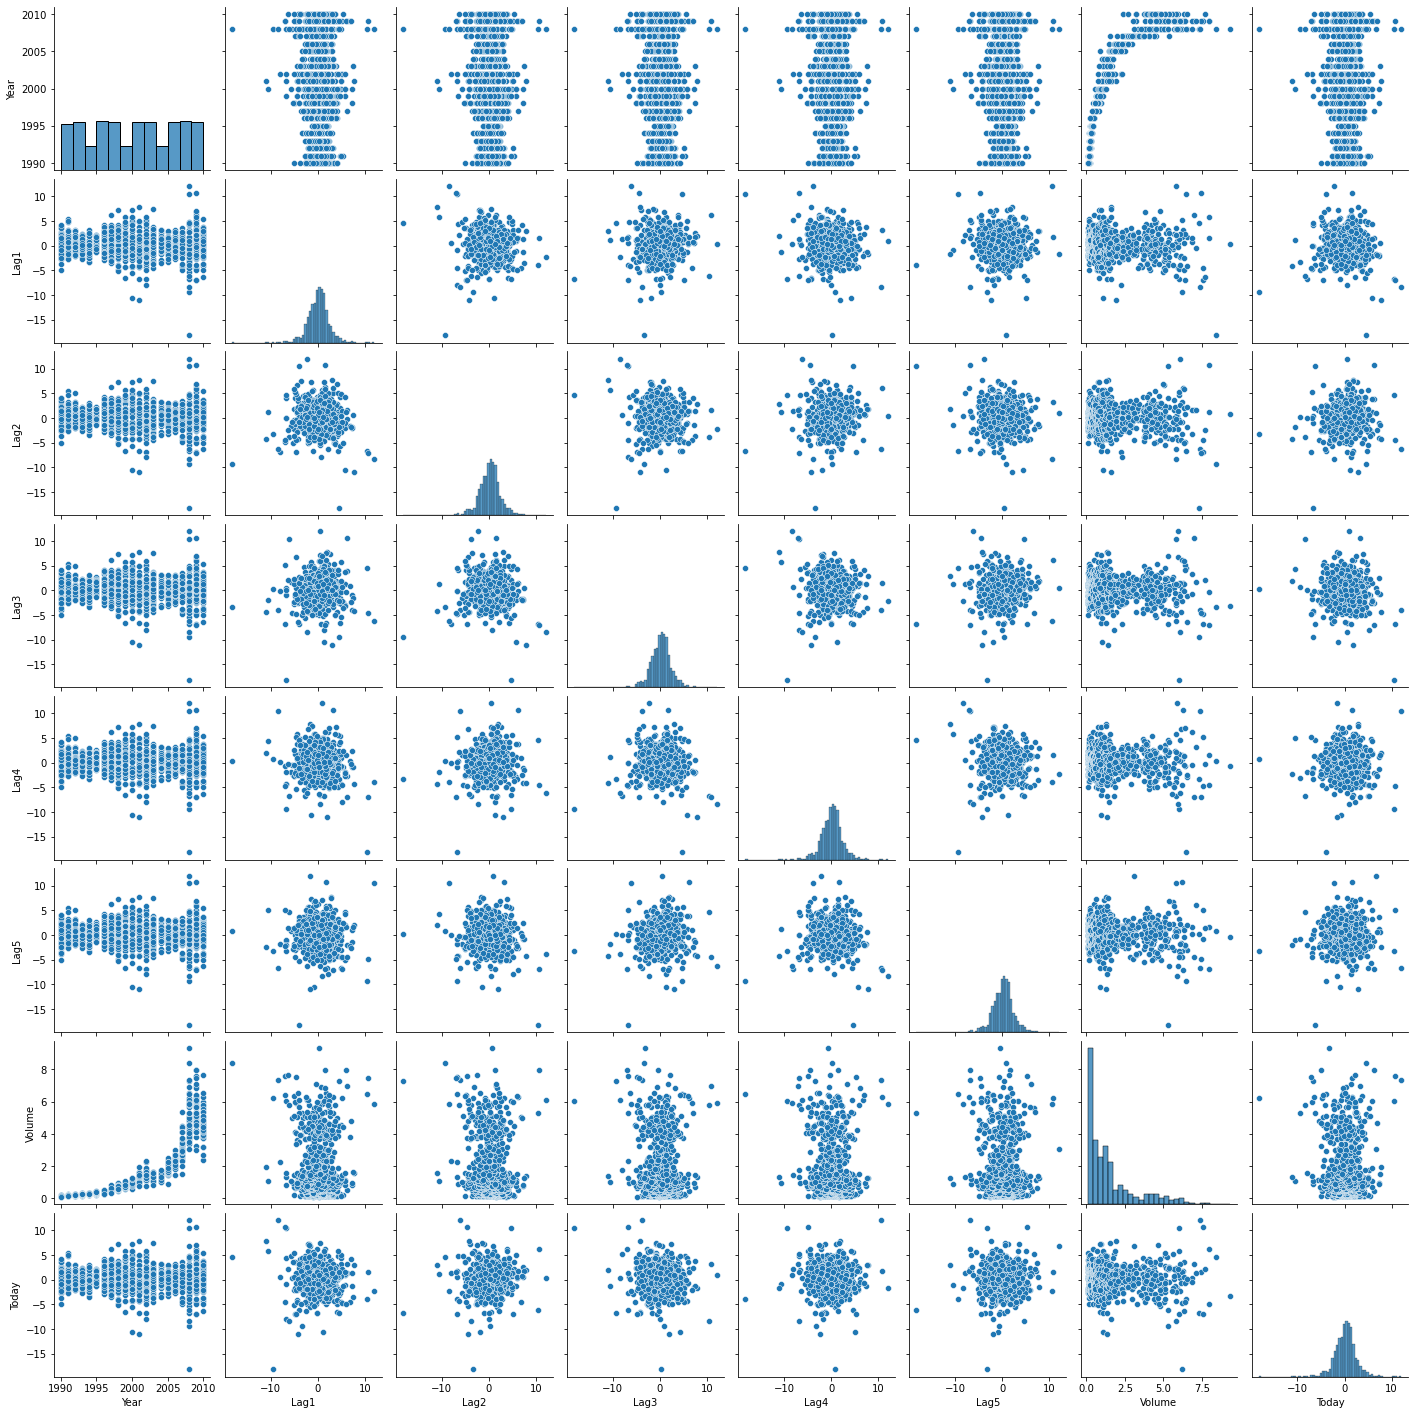

In [8]:
# (a)
sns.pairplot(weekly)

In [9]:
weekly.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


In [10]:
weekly.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


In [12]:
# (b)

df = weekly.copy()
df['Direction'] = np.where(weekly['Direction']=='Up', 1, 0)
results = smf.logit('Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume', data=df).fit()
results.summary()

# Only Lag2 seems to be statistically significant predictor

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Wed, 20 Jan 2021   Pseudo R-squ.:                0.006580
Time:                        13:29:20   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

In [13]:
# (c)

results.pred_table()

'''
Error rate = 478/1089 = 43%
False Positive [prediction gives us a positive value but the real value is negative] = 48/102 = 47%
False Negative [prediction gives us a negative value but the real value is positive] = 430/987 = 43%

'''

array([[ 54., 430.],
       [ 48., 557.]])

In [45]:
# (d)
#using scikit_learn for this part; easier to predict and compare

train_df = weekly.copy()
train_df = train_df[train_df['Year'] < 2009]

x = train_df.iloc[:,2].values.reshape(-1,1) #reshape because x is (985,) while classifier takes matrix (985,1)
y = train_df.iloc[:,-1].values #for scikit, no need to subtitute dummy numbers for response

classifier = LogisticRegression(random_state=0).fit(x, y)

In [47]:
test_df = weekly.copy()
test_df = test_df[test_df['Year'] > 2008]

x_test = test_df['Lag2'].values.reshape(-1,1)
y_pred = classifier.predict(x_test)
y_true = test_df['Direction'].values

confusion_matrix(y_true, y_pred)

#correct prediction = 65/104 = 62.5% [Logistic Regression]

array([[ 9, 34],
       [ 5, 56]])

In [50]:
# (e)

clf_lda = LDA(n_components=1).fit(x, y)

y_pred_lda = clf_lda.predict(x_test)
confusion_matrix(y_true, y_pred_lda)

# correct prediction = 62.5% same as Logistic Regression [LDA]

array([[ 9, 34],
       [ 5, 56]])

In [51]:
# (f)

clf_qda = QDA().fit(x, y)

y_pred_qda = clf_qda.predict(x_test)
confusion_matrix(y_true, y_pred_qda)

# correct prediction = 61% [QDA]

array([[ 0, 43],
       [ 0, 61]])

In [53]:
# (g)

clf_knn = KNeighborsClassifier(n_neighbors=1).fit(x, y)

y_pred_knn = clf_knn.predict(x_test)
confusion_matrix(y_true, y_pred_knn)

# correct prediction = 52/104 = 52% [KNN]

# (h) - LR and LDA seems to provide better predictions

array([[21, 22],
       [30, 31]])

### QUESTION 11

In [54]:
auto = pd.read_csv('/home/harsh/Desktop/ISLR/dataset/Auto_data_csv.csv', na_values='?')
auto.dropna(inplace=True)
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [55]:
# (a)

df = auto.copy()
df['mpg01'] = np.where(df['mpg'] > df['mpg'].median(), 1, 0)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,0


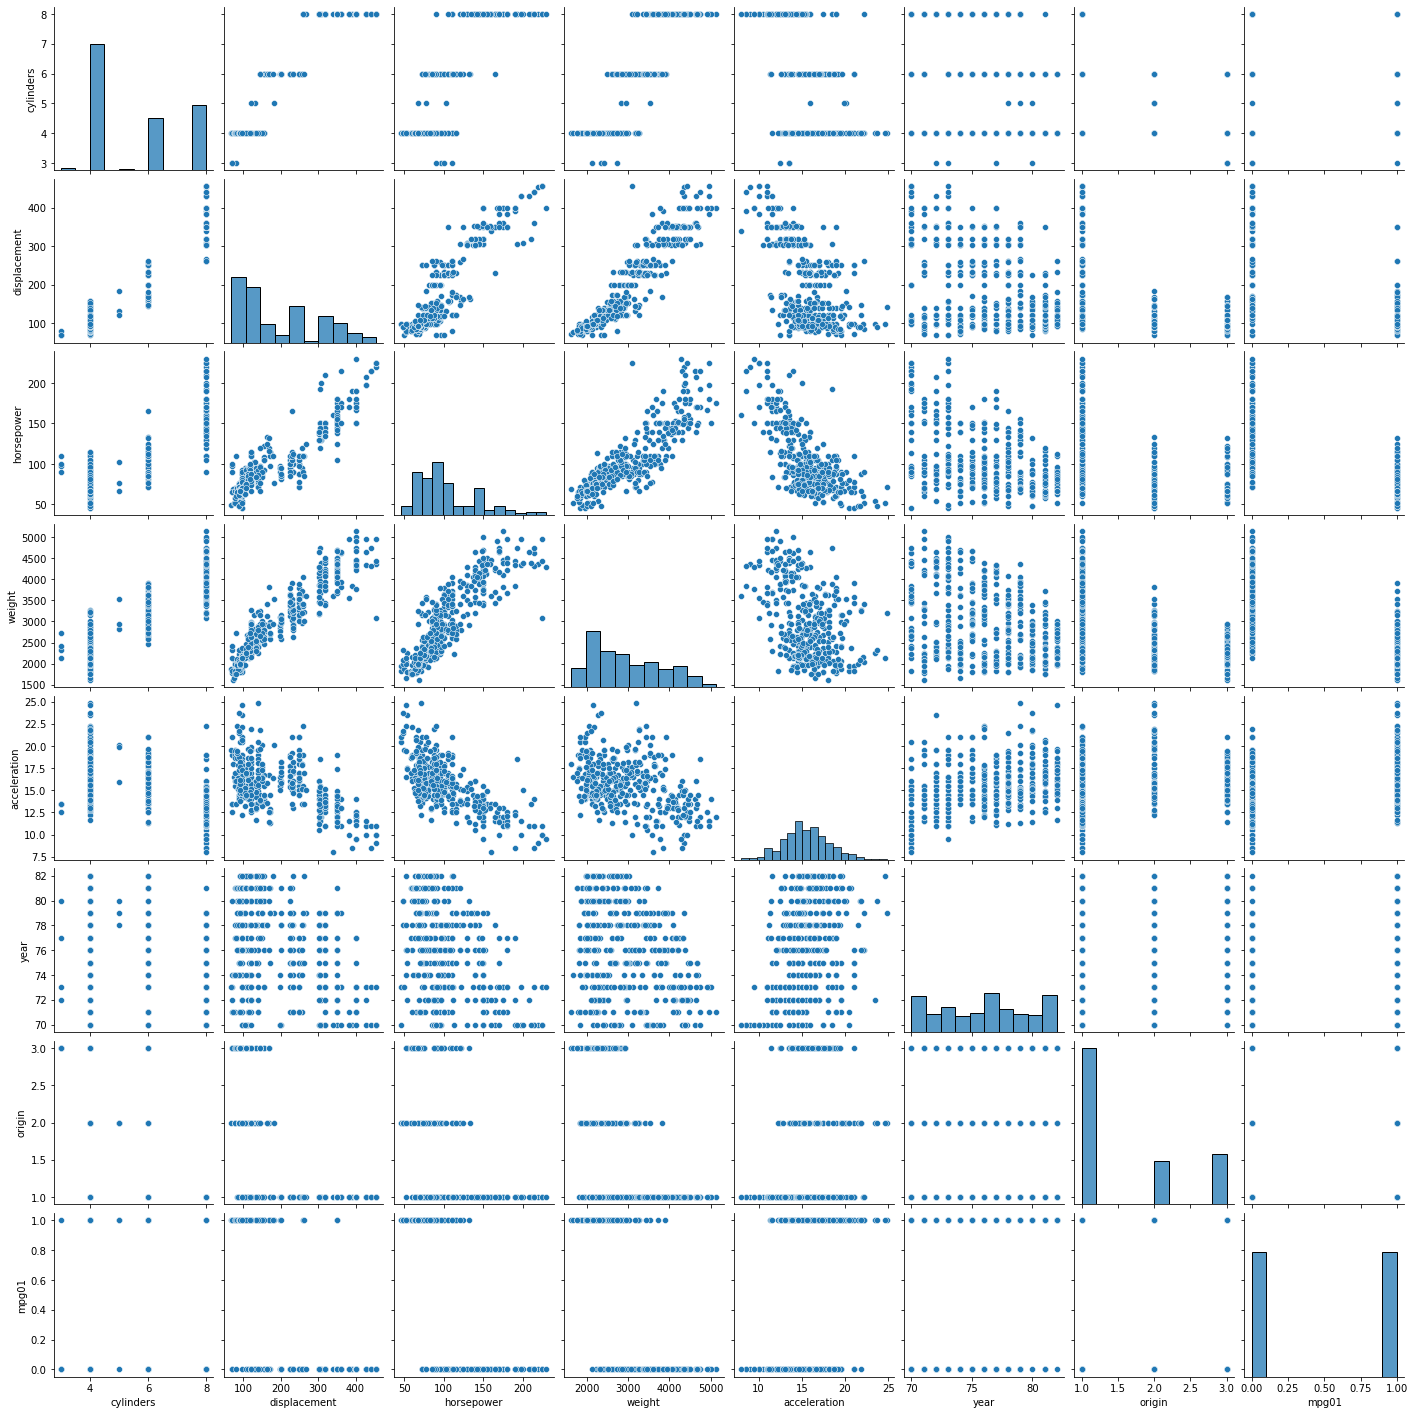

In [59]:
# (b)

sns.pairplot(df)

# seems like horsepower, weight and accleration might have some predictive power for mpg01

In [81]:
# (c)

X = df[['displacement','horsepower','weight', 'acceleration']].values
Y = df['mpg01']

x_train, x_test, y_train, y_test = train_test_split(X, Y)

In [84]:
# (d)

clf_lda = LDA(n_components=1).fit(x_train, y_train)

y_pred_lda = clf_lda.predict(x_test)
confusion_matrix(y_test, y_pred_lda)

# Test error of the model = 8%

array([[39,  7],
       [ 1, 51]])

In [85]:
# (e)

clf_qda = QDA().fit(x_train, y_train)

y_pred_qda = clf_qda.predict(x_test)
confusion_matrix(y_test, y_pred_qda)

# Test error of the model = 8%

array([[41,  5],
       [ 3, 49]])

In [86]:
# (f)

clf_lr = LogisticRegression(random_state=0).fit(x_train, y_train)

y_pred_lr = clf_lr.predict(x_test)
confusion_matrix(y_test, y_pred_lr)

# Test error of the model = 10.2%

array([[41,  5],
       [ 5, 47]])

In [92]:
# (g)

clf_knn = KNeighborsClassifier(n_neighbors=6).fit(x_train, y_train)

y_pred_knn = clf_knn.predict(x_test)
confusion_matrix(y_test, y_pred_knn)

#Test error for n=1 - 11
#Test error for n=2 - 13
#Test error for n=3 - 9
#Test error for n=4 - 9
#Test error for n=5 - 11
#Test error for n=6 - 11

#3 or 4 seems to give best performance

array([[41,  5],
       [ 6, 46]])

### QUESTION 13

In [93]:
boston = pd.read_csv('/home/harsh/Desktop/ISLR/dataset/Boston.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


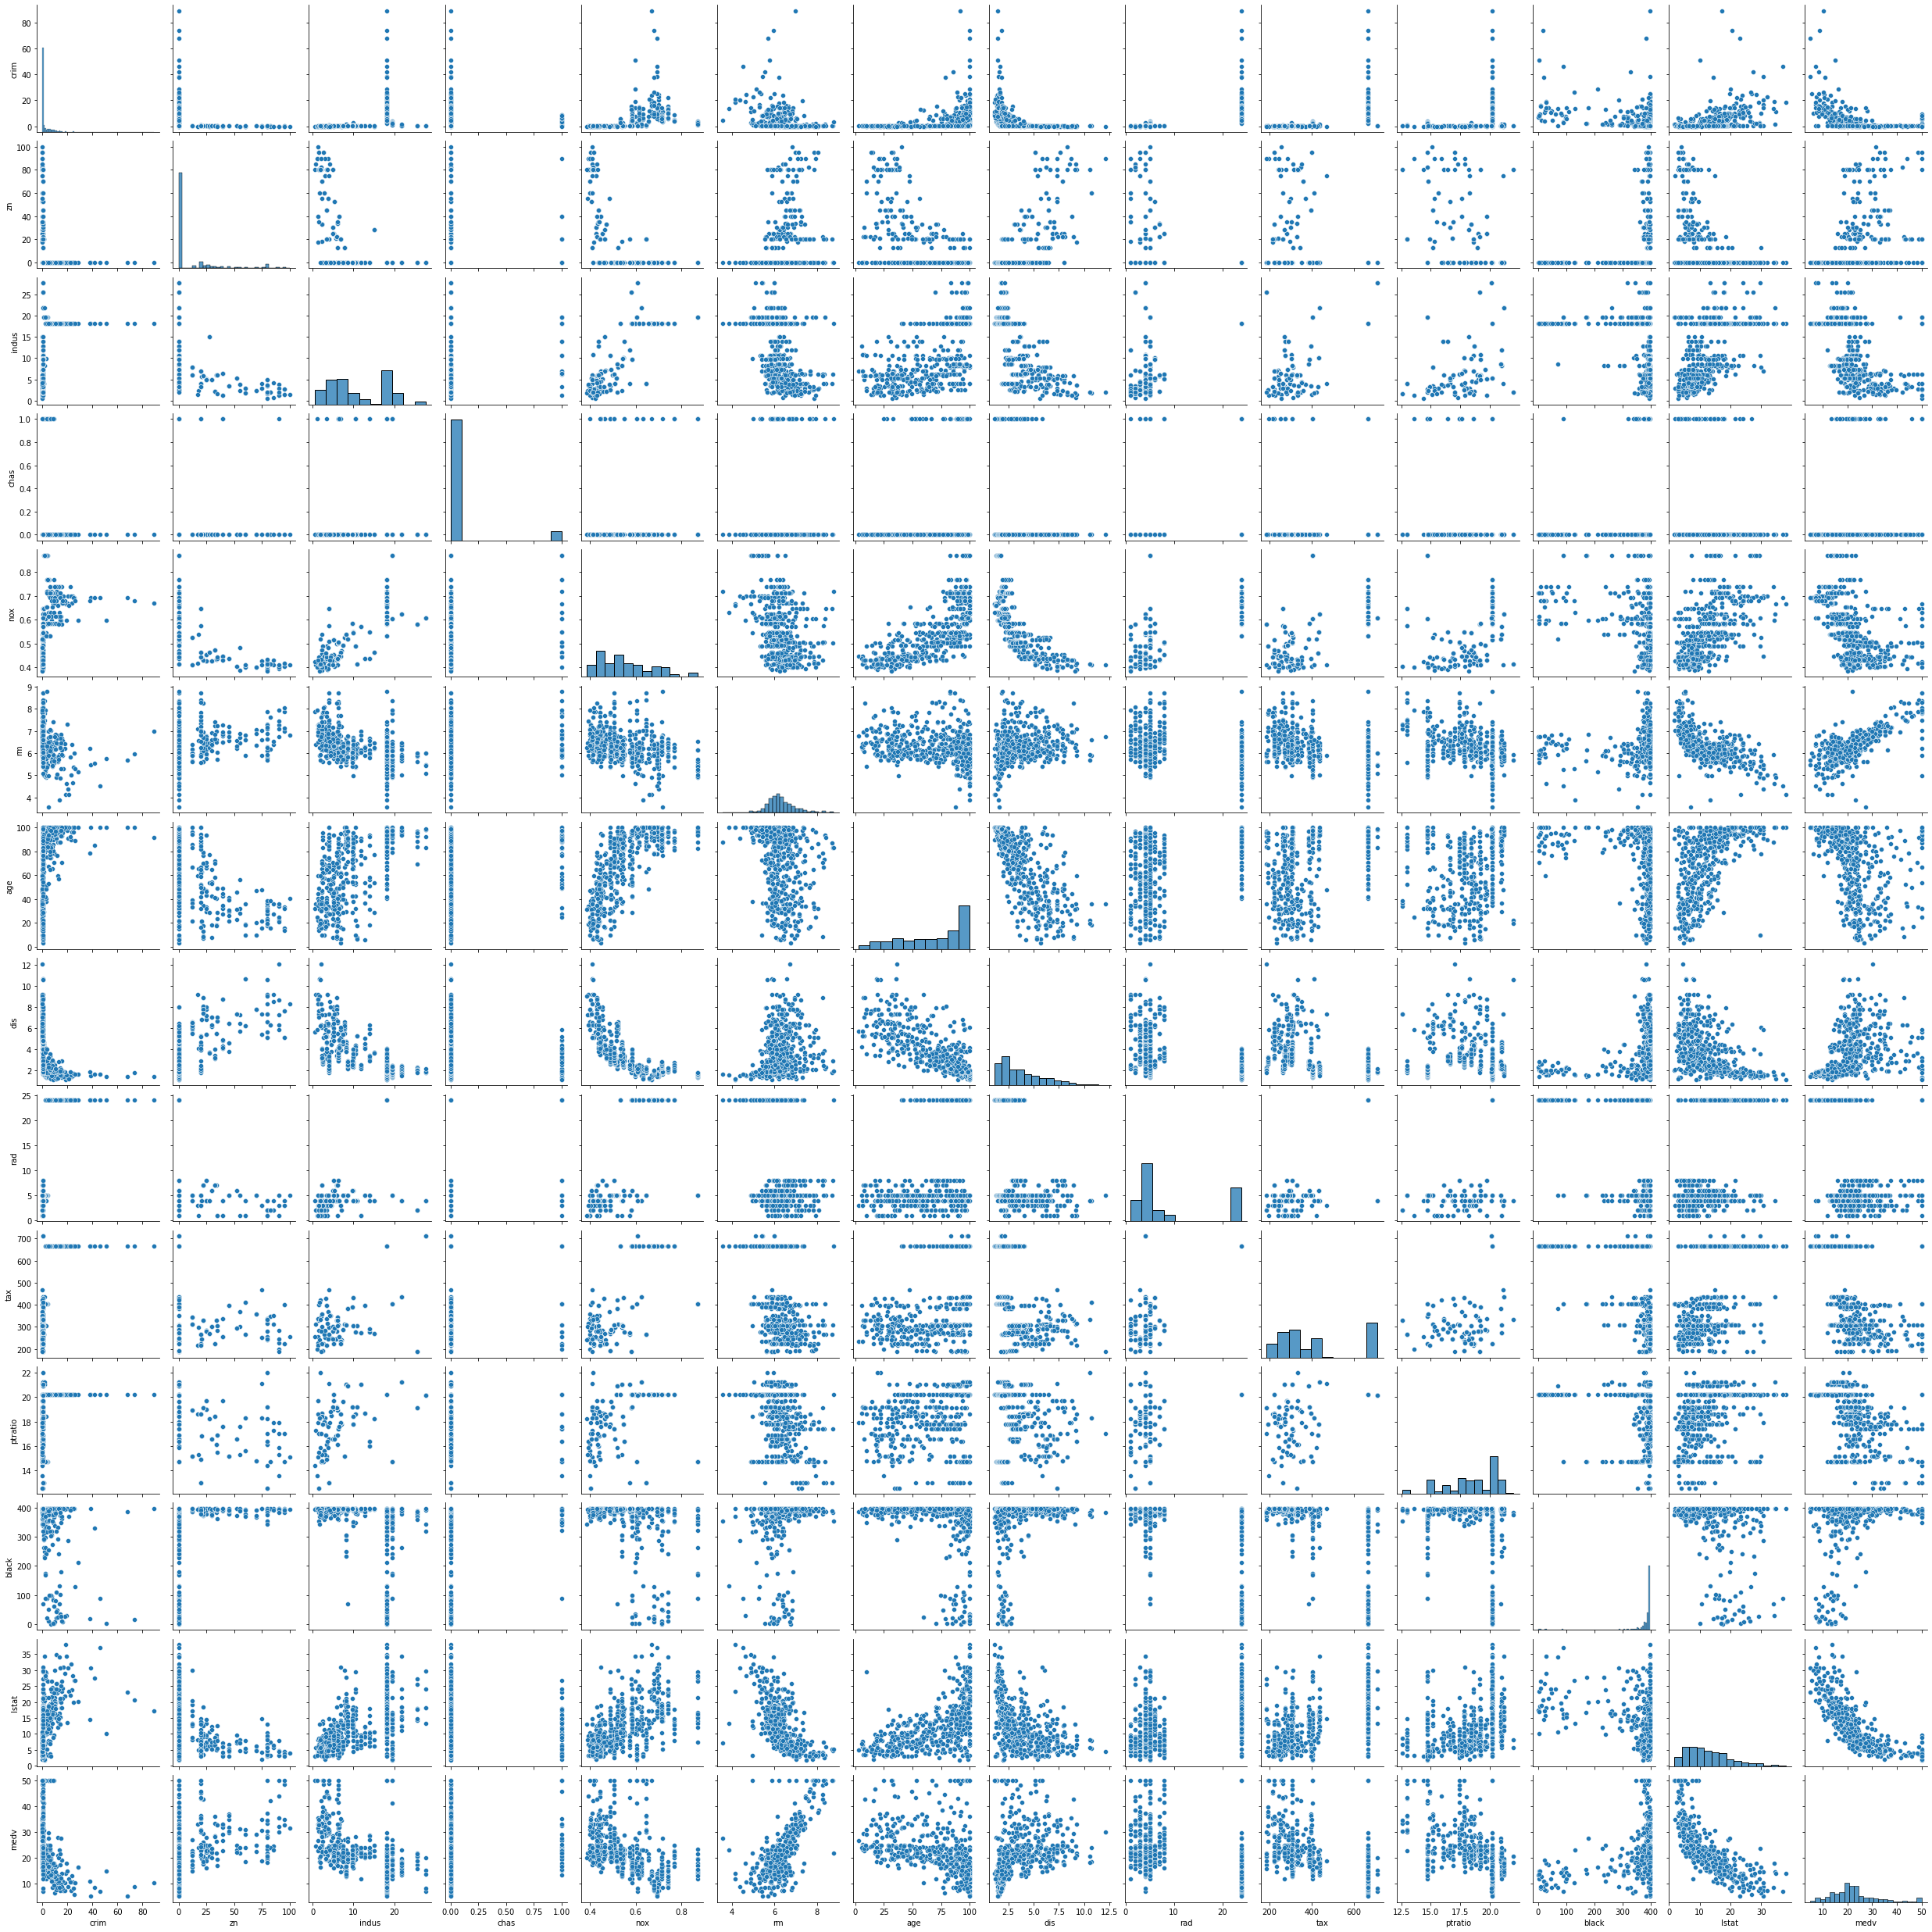

In [94]:
sns.pairplot(boston)

In [100]:
df = boston.copy()
df['crim_indicator'] = np.where(df['crim'] > df['crim'].median(), 1, 0)
df.drop('crim', axis=1, inplace=True)
df.head()

X = df[['indus', 'nox', 'rad', 'tax', 'lstat', 'black', 'medv']].values
Y = df['crim_indicator']

x_train, x_test, y_train, y_test = train_test_split(X, Y)

In [104]:
# LOGISTIC REGRESSION

clf_lr = LogisticRegression(random_state=0).fit(x_train, y_train)

y_pred_lr = clf_lr.predict(x_test)
confusion_matrix(y_test, y_pred_lr)

# Error Rate = 12%

array([[66,  6],
       [ 9, 46]])

In [105]:
# LDA

clf_lda = LDA(n_components=1).fit(x_train, y_train)

y_pred_lda = clf_lda.predict(x_test)
confusion_matrix(y_test, y_pred_lda)

# Test error of the model = 16%

array([[66,  6],
       [14, 41]])

In [112]:
# KNN

clf_knn = KNeighborsClassifier(n_neighbors=7).fit(x_train, y_train)

y_pred_knn = clf_knn.predict(x_test)
confusion_matrix(y_test, y_pred_knn)

#Test error for n=1 - 9
#Test error for n=2 - 11
#Test error for n=3 - 8
#Test error for n=4 - 8
#Test error for n=5 - 12
#Test error for n=6 - 10
#Test error for n=7 - 9


#3 or 4 seems to give best performance

array([[66,  6],
       [ 3, 52]])